In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('cancer.csv')
df.head()


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [12]:
# EDA
print("shape: ", df.shape)
print("\nmissing values ", df.isnull().sum())
print("\nduplicates: ", df.duplicated().sum())
print("\nclass distribution: ", df['Level'].value_counts())

shape:  (1000, 26)

missing values  index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

duplicates:  0

class distribution:  Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


In [13]:
# handle empty,. categorical, duplciated records
df.drop_duplicates(inplace=True)

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder() 
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

                             index  Patient Id       Age    Gender  \
index                     1.000000    1.000000  0.002674 -0.025739   
Patient Id                1.000000    1.000000  0.002674 -0.025739   
Age                       0.002674    0.002674  1.000000 -0.202086   
Gender                   -0.025739   -0.025739 -0.202086  1.000000   
Air Pollution             0.053307    0.053307  0.099494 -0.246912   
Alcohol use               0.041374    0.041374  0.151742 -0.227636   
Dust Allergy              0.037960    0.037960  0.035202 -0.204312   
OccuPational Hazards      0.032355    0.032355  0.062177 -0.192343   
Genetic Risk              0.030725    0.030725  0.073151 -0.222727   
chronic Lung Disease      0.025177    0.025177  0.128952 -0.205061   
Balanced Diet             0.030743    0.030743  0.004863 -0.099741   
Obesity                   0.050584    0.050584  0.034337 -0.123813   
Smoking                   0.018407    0.018407  0.075333 -0.206924   
Passive Smoker      

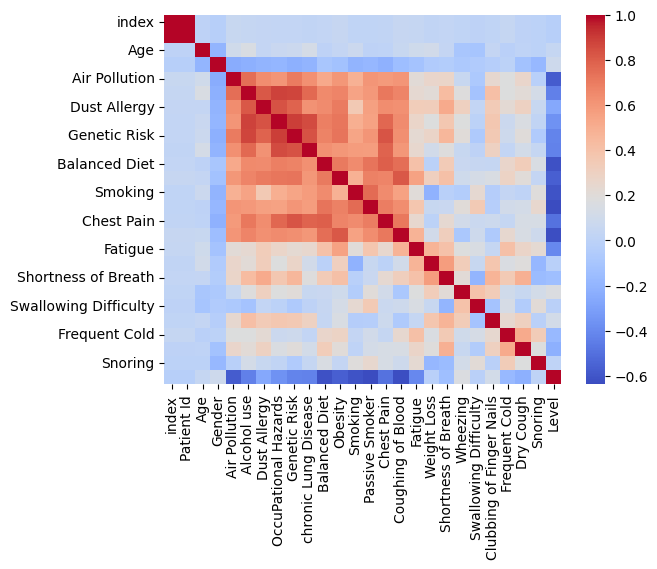

corr with target Level                       1.000000
Passive Smoker              0.638409
Coughing of Blood           0.631118
Balanced Diet               0.618781
Smoking                     0.611087
Air Pollution               0.577269
Obesity                     0.561961
Chest Pain                  0.494704
Alcohol use                 0.434071
chronic Lung Disease        0.432405
Genetic Risk                0.423382
Fatigue                     0.403276
OccuPational Hazards        0.363748
Dust Allergy                0.264926
Dry Cough                   0.228720
Frequent Cold               0.171678
Wheezing                    0.167773
Shortness of Breath         0.140178
Clubbing of Finger Nails    0.116746
Gender                      0.086222
Age                         0.042631
Patient Id                  0.024556
index                       0.024556
Weight Loss                 0.020537
Snoring                     0.014280
Swallowing Difficulty       0.012880
Name: Level, dtype: f

In [ ]:
# correlation and feature scaling PEARSON
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

corr_target = corr['Level'].abs().sort_values(ascending=False)
print("corr with target", corr_target)

In [22]:
# Feature Scaling
df.describe()

scaler = StandardScaler()
X = df.drop(['Level', 'Patient Id'], axis=1)
y=df['Level']

X = scaler.fit_transform(X)

# split dataset 
# 80train 20%test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_main, X_val, y_train_main, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)


# train decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_main, y_train_main)

train_acc = accuracy_score(y_train_main, dt.predict(X_train_main))
test_acc = accuracy_score(y_test, dt.predict(X_test))
val_acc = accuracy_score(y_val, dt.predict(X_val))

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Validation Accuracy: {val_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


Training Accuracy: 1.000
Validation Accuracy: 1.000
Test Accuracy: 1.000
